In [28]:
import psycopg2
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('form5500_data/config.json') as f:
    conf = json.load(f)
    host = conf['host']
    database = conf['database']
    user = conf['user']
    passw = conf['passw']
conn_str = "host={} dbname={} user={} password={}".format(host, database, user, passw)
conn = psycopg2.connect(conn_str)

In [3]:
query = '''SELECT sb.SB_EIN AS EIN, sb.SB_PN AS PN, sb.SB_EFF_INT_RATE_PRCNT AS EIR, sb.SB_PLAN_TYPE_CODE,
       sb.SB_TOT_PARTCP_CNT AS PART_CNT_2016, sb.SB_TOT_FNDNG_TGT_AMT AS FNDNG_TGT_2016, 
       sb.SB_TGT_NRML_COST_01_AMT AS TGT_NRML_COST_2016, sb2.SB_TOT_FNDNG_TGT_AMT AS FNDNG_TGT_2017,
       sb2.SB_TOT_PARTCP_CNT AS PART_CNT_2017, 
       f.TYPE_PENSION_BNFT_CODE, f.PLAN_NAME, f.SPONSOR_DFE_NAME,
       h.DISTRIB_DRT_PARTCP_AMT, h.TOT_DISTRIB_BNFT_AMT
       FROM sb_full sb
       LEFT JOIN sb_full sb2
       ON sb.SB_EIN = sb2.SB_EIN AND sb.SB_PN = sb2.SB_PN
       LEFT JOIN f5500_full f
       ON sb.SB_EIN = f.SPONS_DFE_EIN AND sb.SB_PN = f.SPONS_DFE_PN
       LEFT JOIN h_full h
       ON sb.SB_EIN = h.SCH_H_EIN AND sb.SB_PN = h.SCH_H_PN
       WHERE sb.SB_PLAN_TYPE_CODE = '1'
       AND sb.SB_PLAN_YEAR_BEGIN_DATE = '2016-01-01'
       AND sb2.SB_PLAN_YEAR_BEGIN_DATE = '2017-01-01'
       AND h.SCH_H_PLAN_YEAR_BEGIN_DATE = '2016-01-01';
       '''

In [4]:
df = pd.read_sql(query, con=conn)
conn.close()

In [5]:
df

,ein,pn,eir,sb_plan_type_code,part_cnt_2016,fndng_tgt_2016,tgt_nrml_cost_2016,fndng_tgt_2017,part_cnt_2017,type_pension_bnft_code,plan_name,sponsor_dfe_name,distrib_drt_partcp_amt,tot_distrib_bnft_amt
0,560486957,1,6.13,1,120,8762488,388723.0,9572818,127,1A,T. W. GARNER FOOD COMPANY EMPLOYEES' PENSION PLAN,T. W. GARNER FOOD COMPANY,343620.0,343620.0
1,640220550,2,5.91,1,483,23158633,0.0,23584078,480,1A1I,RENASANT BANK AMENDED AND RESTATED PENSION PLAN,RENASANT BANK,2022193.0,2022193.0
2,580254510,1,6.11,1,25631,1588239082,9200000.0,1587936621,23333,1A3H,GENUINE PARTS COMPANY PENSION PLAN,GENUINE PARTS COMPANY,138227658.0,138227658.0
3,251538192,2,6.01,1,207,1298395,103952.0,1512716,229,1A1C1D,BURNS WHITE DEFINED BENEFIT PLAN,BURNS WHITE LLC,15395.0,15395.0
4,510377325,2,6.02,1,803,21312047,260000.0,21003436,634,1A1I,TOWNSENDS COMBINED PENSION PLAN,THE INDIAN RIVER TRUST,1950582.0,1950582.0
5,237211935,2,6.04,1,195,20142543,0.0,20409984,190,1A1F1I,FINANCIAL ACCOUNTING FOUNDATION EMPLOYEES' PEN...,FINANCIAL ACCOUNTING FOUNDATION,1237598.0,1237598.0
6,630363853,1,6.18,1,142,8771228,427192.0,9761419,148,1A1C,LEGACY COMMUNITY FEDERAL CREDIT UNION CASH BAL...,LEGACY COMMUNITY FEDERAL CREDIT UNION,225365.0,225365.0
7,161015782,1,6.00,1,113,10161550,84000.0,10220223,111,1A1I,PENSION PLAN OF UNITED WAY OF GREATER ROCHESTE...,"UNITED WAY OF GREATER ROCHESTER, INC.",720278.0,720278.0
8,363081482,3,6.08,1,135,6468315,859290.0,7917338,142,1A1C,RGA CASH BALANCE PLAN,"ROCKFORD GASTROENTEROLOGY ASSOCIATES, LTD.",64857.0,64857.0
9,522168499,4,6.09,1,224,11044211,0.0,11385755,222,1A3H,AMERICAN PSYCHIATRIC ASSOCIATION PENSION PLAN,AMERICAN PSYCHIATRIC ASSOCIATION,512727.0,512727.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 14 columns):
ein                       4581 non-null int64
pn                        4581 non-null int64
eir                       4581 non-null float64
sb_plan_type_code         4581 non-null object
part_cnt_2016             4581 non-null object
fndng_tgt_2016            4581 non-null int64
tgt_nrml_cost_2016        4564 non-null float64
fndng_tgt_2017            4581 non-null int64
part_cnt_2017             4581 non-null object
type_pension_bnft_code    4568 non-null object
plan_name                 4581 non-null object
sponsor_dfe_name          4581 non-null object
distrib_drt_partcp_amt    4568 non-null float64
tot_distrib_bnft_amt      4572 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 501.1+ KB


<h1>Data Clean Up and Parsing</h1>

<h3>Convert object counts to numeric</h3>

In [7]:
clean_list = ['part_cnt_2016', 'part_cnt_2017']#, 'sb_act_partcp_cnt','sb_term_partcp_cnt', 'sb_rtd_partcp_cnt']

for c in clean_list:
    df[c] = pd.to_numeric(df[c])

df['eir'] = np.where(df['eir']>100, df['eir']/100, df['eir'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 14 columns):
ein                       4581 non-null int64
pn                        4581 non-null int64
eir                       4581 non-null float64
sb_plan_type_code         4581 non-null object
part_cnt_2016             4581 non-null int64
fndng_tgt_2016            4581 non-null int64
tgt_nrml_cost_2016        4564 non-null float64
fndng_tgt_2017            4581 non-null int64
part_cnt_2017             4581 non-null int64
type_pension_bnft_code    4568 non-null object
plan_name                 4581 non-null object
sponsor_dfe_name          4581 non-null object
distrib_drt_partcp_amt    4568 non-null float64
tot_distrib_bnft_amt      4572 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 501.1+ KB


<h3>Add informational columns to parse data</h3>

In [9]:
df['pay_related'] = df['type_pension_bnft_code'].str.contains('1A')
df['cash_bal'] = df['type_pension_bnft_code'].str.contains('1C')
df['frozen'] = df['type_pension_bnft_code'].str.contains('1I')
df['pbgc_takeover'] = df['type_pension_bnft_code'].str.contains('1H')
df['not_qual'] = df['type_pension_bnft_code'].str.contains('3B','3C')

In [10]:
df.groupby('not_qual')['ein'].count()

not_qual
False    4479
True       89
Name: ein, dtype: int64

<h3>Restrict analysis to: </h3>
<h5><ul><li>active participant count between 100 and 300,000
        <li>funding target non-zero
        <li>filing as tax qualified
    </ul>

In [11]:
df = df[(df['fndng_tgt_2016'] > 0) & (df['fndng_tgt_2017'] > 0) &\
      (df['part_cnt_2017'] < 300000) & (df['part_cnt_2017'] > 100) & \
       (df['not_qual'] == False)]

In [12]:
df.dropna(inplace=True)

In [13]:
df.describe()

,ein,pn,eir,part_cnt_2016,fndng_tgt_2016,tgt_nrml_cost_2016,fndng_tgt_2017,part_cnt_2017,distrib_drt_partcp_amt,tot_distrib_bnft_amt
count,4.324000e+03,4324.000000,4324.000000,4324.000000,4.324000e+03,4.324000e+03,4.324000e+03,4324.000000,4.324000e+03,4.324000e+03
mean,4.355029e+08,7.819611,6.067218,4476.029833,4.083369e+08,6.580108e+06,4.212721e+08,4378.216929,3.286182e+07,3.347812e+07
std,2.645728e+08,31.465616,0.231209,21156.128506,2.582163e+09,4.077382e+07,2.624912e+09,20572.908837,2.021918e+08,2.034673e+08
min,1.002024e+07,1.000000,3.880000,101.000000,5.104090e+05,0.000000e+00,1.132839e+06,105.000000,6.400000e+02,6.400000e+02
25%,2.303705e+08,1.000000,6.000000,205.000000,9.852158e+06,9.585100e+04,1.020234e+07,197.000000,5.837210e+05,5.854980e+05
50%,3.823976e+08,1.000000,6.080000,415.000000,2.289357e+07,4.814240e+05,2.370096e+07,376.000000,1.584158e+06,1.627990e+06
75%,6.103928e+08,3.000000,6.160000,1394.000000,7.873952e+07,1.507965e+06,7.981958e+07,1352.000000,6.129801e+06,6.580836e+06
max,9.900928e+08,398.000000,8.250000,287809.000000,4.069247e+10,5.874179e+08,4.037659e+10,281793.000000,3.429693e+09,3.429693e+09


In [14]:
X = df[['eir', 'part_cnt_2016', 'fndng_tgt_2016', 'tgt_nrml_cost_2016','distrib_drt_partcp_amt']]

In [15]:
y = df['fndng_tgt_2017']

In [23]:
def calc_rollforward(row):
    '''
    input:  pandas dataframe with prior year funding target, normal cost, effective interest rate,
            participant distributions
    returns: pandas dataframe with add'l column of rolled forward funding target
    '''
    return (row['fndng_tgt_2016'] + row['tgt_nrml_cost_2016'])*(1+row['eir']/100) - \
    row['distrib_drt_partcp_amt'] *(1+row['eir']/200)

In [24]:
X['fndng_tgt_rf'] = X.apply (lambda row: calc_rollforward(row), axis=1)

In [25]:
X

,eir,part_cnt_2016,fndng_tgt_2016,tgt_nrml_cost_2016,distrib_drt_partcp_amt,fndng_tgt_rf
0,6.13,120,8762488,388723.0,343620.0,9.358028e+06
1,5.91,483,23158633,0.0,2022193.0,2.244536e+07
2,6.11,25631,1588239082,9200000.0,138227658.0,1.552592e+09
3,6.01,207,1298395,103952.0,15395.0,1.470770e+06
4,6.02,803,21312047,260000.0,1950582.0,2.086139e+07
5,6.04,195,20142543,0.0,1237598.0,2.008418e+07
6,6.18,142,8771228,427192.0,225365.0,9.534554e+06
7,6.00,113,10161550,84000.0,720278.0,1.011840e+07
8,6.08,135,6468315,859290.0,64857.0,7.706295e+06
9,6.09,224,11044211,0.0,512727.0,1.118846e+07


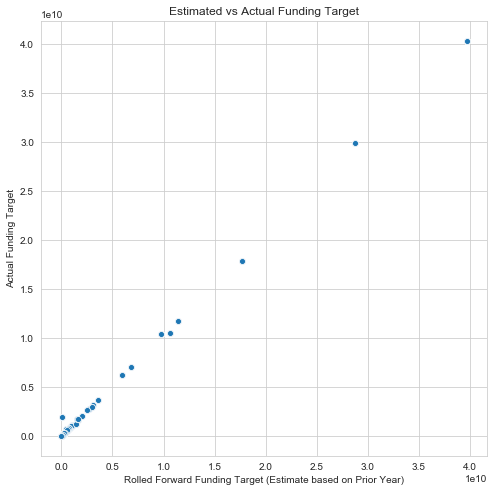

In [30]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x=X['fndng_tgt_rf'], y=y)
ax.set_xlabel('Rolled Forward Funding Target (Estimate based on Prior Year)')
ax.set_ylabel('Actual Funding Target')
ax.set_title('Estimated vs Actual Funding Target')
plt.show()

In [35]:
residuals = y/ X['fndng_tgt_rf'] - 1

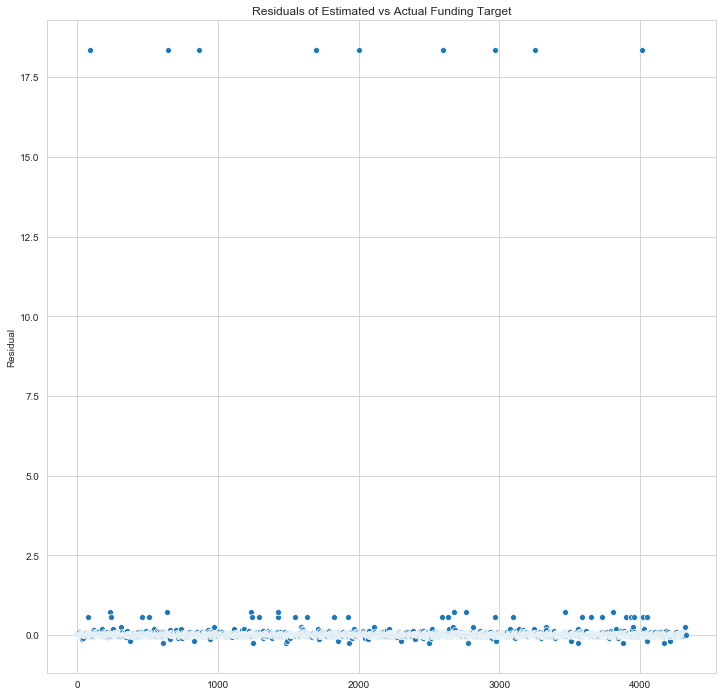

In [36]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
sns.scatterplot(x=np.linspace(0,len(residuals),len(residuals)), y=residuals)
ax.set_ylabel('Residual')
ax.set_title('Residuals of Estimated vs Actual Funding Target')
plt.show()

In [49]:
residuals[residuals<2]

0       0.022952
1       0.050733
2       0.022765
3       0.028519
4       0.006809
5       0.016222
6       0.023794
7       0.010063
8       0.027386
9       0.017633
10      0.045449
11      0.043665
12      0.021917
13      0.013743
14     -0.000060
15      0.013857
16      0.093049
17      0.018235
18      0.020770
19      0.066699
20     -0.001523
21      0.033334
22      0.044539
23      0.006287
24      0.019357
25     -0.008125
26      0.038941
27     -0.001484
28      0.040771
29      0.032619
          ...   
4549    0.033485
4550    0.033120
4551   -0.013499
4552    0.018490
4553    0.024281
4555    0.028824
4556    0.023660
4557    0.027309
4558   -0.005964
4559    0.107153
4560    0.004944
4561    0.015273
4562    0.070550
4563    0.039216
4565    0.062070
4566   -0.003317
4567    0.046217
4568    0.028036
4569    0.018988
4570   -0.013276
4571    0.008090
4572    0.243775
4573    0.025683
4574    0.031906
4575    0.052996
4576    0.042452
4577    0.011739
4578    0.0359

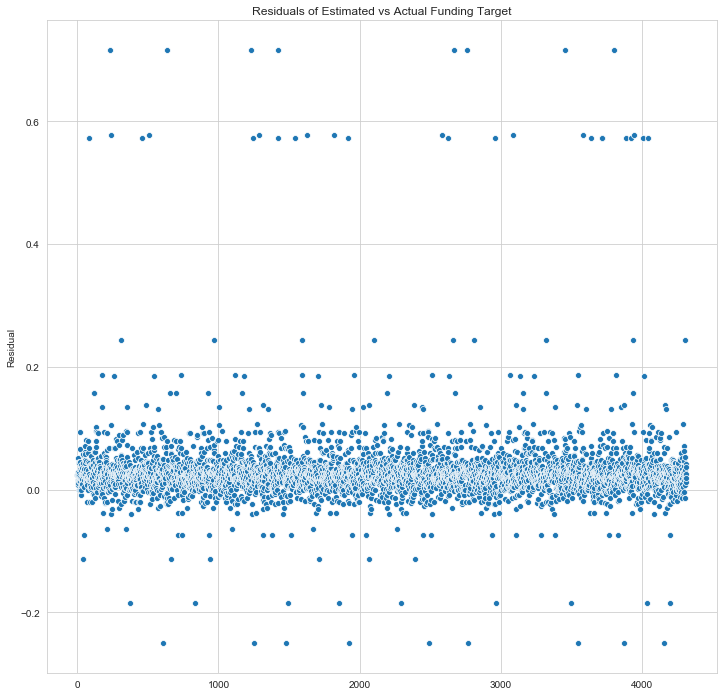

In [51]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
y = residuals[residuals<2]
x = np.linspace(0,len(y),len(y))
sns.scatterplot(x=x, y=y)
ax.set_ylabel('Residual')
ax.set_title('Residuals of Estimated vs Actual Funding Target')
plt.show()

In [53]:
len(residuals)

4324